## COS748 - Busca e Mineração de Texto (Trabalho Final)
**Alunos:**
- Pedro Boechat
- Pedro Kuchpil

<hr>

### Imports

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

### Load dataset

In [3]:
df = pd.read_json(
    "./data/data.zip",
    orient="records"
)

### Extract column data

In [4]:
df["year"] = df["created.date-parts"].apply(lambda x: x[0][0] if isinstance(x, list) else None)

### Exploratory Data Analysis

#### 1) Titles

In [5]:
print(f"There are {df['title'].dropna().shape[0]} ({df['title'].dropna().shape[0]*100/df.shape[0]:.2f}%) non-null titles.")

There are 68211 (96.42%) non-null titles.


In [6]:
print("Titles that appear more than twice:")
display({
    key: value
    for key, value in df["title"].astype(str).value_counts(dropna=False).items()
    if value > 2
})

Titles that appear more than twice:


{'None': 2529,
 '[]': 177,
 'Editorial': 30,
 'Apresentação': 19,
 '[NO TITLE AVAILABLE]': 14,
 'TheHerschelVirgo Cluster Survey': 14,
 'Some Items of Interest to Process R&D Chemists and Engineers': 12,
 '': 7,
 'Abstracts': 7,
 'Preface': 5,
 'Groupware: Design, Implementation, and Use': 5,
 'The authors reply': 4,
 'EDITORIAL': 4,
 'Inductive Logic Programming': 3,
 'In Reply': 3,
 'Reply': 3,
 "Authors' response": 3,
 'Palavras dos Editores': 3,
 'APRESENTAÇÃO': 3}

#### 2) Abstract

In [7]:
print(f"There are {df['abstract'].dropna().shape[0]} ({df['abstract'].dropna().shape[0]*100/df.shape[0]:.2f}%) non-null abstracts.")

There are 17290 (24.44%) non-null abstracts.


#### 3) Subject

In [8]:
print(f"There are {df['subject'].dropna().shape[0]} ({df['subject'].dropna().shape[0]*100/df.shape[0]:.2f}%) non-null subjects.")

There are 57948 (81.92%) non-null subjects.


#### 4) Year

In [9]:
print(f"There are {df['year'].dropna().shape[0]} ({df['year'].dropna().shape[0]*100/df.shape[0]:.2f}%) non-null years.")

There are 68207 (96.42%) non-null years.


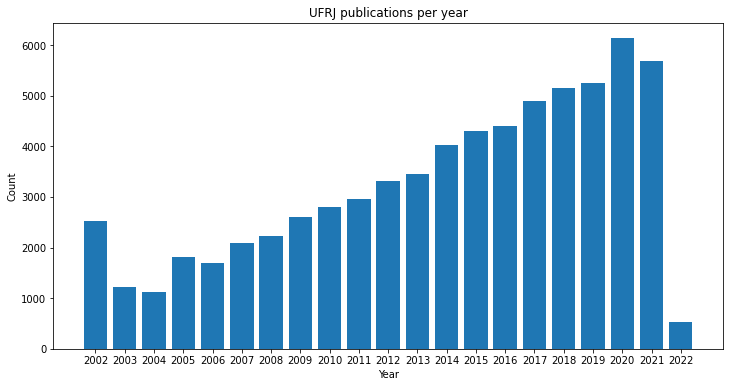

In [10]:
_ = df['year'].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(_.keys(), _.values())
ax.set_xticks(list(_.keys()))
ax.set_title("UFRJ publications per year")
ax.set_xlabel("Year")
ax.set_ylabel("Count");

#### 5) Language

In [12]:
df["language"].value_counts(dropna=False)

en     44193
NaN    26226
pt       205
fr        57
es        37
de        21
ja         1
Name: language, dtype: int64

In [13]:
df.loc[pd.isna(df["language"])]["title"].dropna().sample(10)

20552    Plataformas online de participação cidadã: met...
68107    Punidos por baixo desempenho: impactos da gove...
55615    President Bolsonaro’s Promises and Actions on ...
48178    The new Meghalayan Age: What does it Imply for...
48947    O trabalho de parto do obstetra: estilo de pen...
64794    Atributos raciais no funcionamento do Sistema ...
26864               A memória nos textos iniciais de Freud
67426    THE IMPORTANCE OF CULTURE FOR THE DEVELOPMENT ...
30337    Cutting-edge application of ultrasound elastog...
13669    Loss minimisation strategy for DFIG in wind tu...
Name: title, dtype: object

**To-Do**
- LangDetect: https://www.geeksforgeeks.org/detect-an-unknown-language-using-python/
- Text fields HTML sanitizing
- Remove NaN (using 'title' column)
- Create conda env